In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("amazon_sales_dataset.csv") 

In [3]:
df.head(5)

,OrderID,CustomerID,ProductCategory,City,Quantity,UnitPrice,PaymentMethod,OrderStatus,OrderDate,TotalAmount
0,1,4174,Beauty,Delhi,2,4108,COD,Delivered,2022-01-01 00:00:00,8216
1,2,4507,Books,Delhi,3,3298,Card,Delivered,2022-01-01 01:00:00,9894
2,3,1860,Books,Delhi,1,4890,UPI,Delivered,2022-01-01 02:00:00,4890
3,4,2294,Electronics,Pune,4,2624,NetBanking,Cancelled,2022-01-01 03:00:00,10496
4,5,2130,Sports,Mumbai,3,1185,Card,Delivered,2022-01-01 04:00:00,3555


In [4]:
df.columns

Index(['OrderID', 'CustomerID', 'ProductCategory', 'City', 'Quantity',
       'UnitPrice', 'PaymentMethod', 'OrderStatus', 'OrderDate',
       'TotalAmount'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderID          1000 non-null   int64 
 1   CustomerID       1000 non-null   int64 
 2   ProductCategory  1000 non-null   object
 3   City             1000 non-null   object
 4   Quantity         1000 non-null   int64 
 5   UnitPrice        1000 non-null   int64 
 6   PaymentMethod    1000 non-null   object
 7   OrderStatus      1000 non-null   object
 8   OrderDate        1000 non-null   object
 9   TotalAmount      1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [6]:
df.describe()

,OrderID,CustomerID,Quantity,UnitPrice,TotalAmount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,3032.449000,2.535000,2626.142000,6619.38700
std,288.819436,1138.944012,1.133163,1370.198849,4813.40825
min,1.000000,1001.000000,1.000000,106.000000,107.00000
25%,250.750000,2064.250000,2.000000,1497.000000,2900.75000
50%,500.500000,2981.500000,3.000000,2653.500000,5094.00000
75%,750.250000,4050.250000,4.000000,3799.000000,9548.50000
max,1000.000000,4993.000000,4.000000,4997.000000,19820.00000


In [7]:
df.shape

(1000, 10)

In [8]:
df.isnull().sum()

OrderID            0
CustomerID         0
ProductCategory    0
City               0
Quantity           0
UnitPrice          0
PaymentMethod      0
OrderStatus        0
OrderDate          0
TotalAmount        0
dtype: int64

### Data Processing & Feature ENgineering

In [9]:
# convert date column
df["OrderDate"] = pd.to_datetime(df["OrderDate"])

In [10]:
# Extract time based features
df["OrderYear"] = df["OrderDate"].dt.year
df["OrderMonth"] = df["OrderDate"].dt.month
df["OrderDay"] = df["OrderDate"].dt.day
df["OrderHour"] = df["OrderDate"].dt.hour

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          1000 non-null   int64         
 1   CustomerID       1000 non-null   int64         
 2   ProductCategory  1000 non-null   object        
 3   City             1000 non-null   object        
 4   Quantity         1000 non-null   int64         
 5   UnitPrice        1000 non-null   int64         
 6   PaymentMethod    1000 non-null   object        
 7   OrderStatus      1000 non-null   object        
 8   OrderDate        1000 non-null   datetime64[ns]
 9   TotalAmount      1000 non-null   int64         
 10  OrderYear        1000 non-null   int32         
 11  OrderMonth       1000 non-null   int32         
 12  OrderDay         1000 non-null   int32         
 13  OrderHour        1000 non-null   int32         
dtypes: datetime64[ns](1), int32(4), int64(5),

In [12]:
# Checking unique values and value counts of categorical columns

for col in ["ProductCategory", "City", "PaymentMethod", "OrderStatus"]:
    print(col)
    print(df[col].value_counts())
    print("-"*40)

ProductCategory
ProductCategory
Books          177
Beauty         176
Electronics    175
Clothing       170
Sports         169
Home           133
Name: count, dtype: int64
----------------------------------------
City
City
Kolkata      165
Mumbai       149
Hyderabad    149
Delhi        140
Pune         138
Chennai      138
Bangalore    121
Name: count, dtype: int64
----------------------------------------
PaymentMethod
PaymentMethod
Card          258
UPI           252
NetBanking    251
COD           239
Name: count, dtype: int64
----------------------------------------
OrderStatus
OrderStatus
Delivered    812
Cancelled     99
Returned      89
Name: count, dtype: int64
----------------------------------------


#### Insight: 
* Books are the most sold product
* Kolkata has the highest number of orders
* Card is the most used payment
* 81% orders are delivered

### Correaltion Analysis

In [13]:
# finding correlation of numeric columns

numeric_cols = df.select_dtypes(include="number").columns.tolist()
print(numeric_cols)
print(df[numeric_cols].corr())

['OrderID', 'CustomerID', 'Quantity', 'UnitPrice', 'TotalAmount', 'OrderYear', 'OrderMonth', 'OrderDay', 'OrderHour']
              OrderID  CustomerID  Quantity  UnitPrice  TotalAmount  \
OrderID      1.000000   -0.022745  0.043720   0.028254     0.044748   
CustomerID  -0.022745    1.000000 -0.010714   0.014620     0.012000   
Quantity     0.043720   -0.010714  1.000000  -0.024423     0.602710   
UnitPrice    0.028254    0.014620 -0.024423   1.000000     0.714712   
TotalAmount  0.044748    0.012000  0.602710   0.714712     1.000000   
OrderYear         NaN         NaN       NaN        NaN          NaN   
OrderMonth   0.755905   -0.009255  0.022335   0.034758     0.032864   
OrderDay     0.199166   -0.015557  0.024338  -0.013422     0.011128   
OrderHour    0.008023   -0.027246  0.013384  -0.031854    -0.024016   

             OrderYear  OrderMonth  OrderDay  OrderHour  
OrderID            NaN    0.755905  0.199166   0.008023  
CustomerID         NaN   -0.009255 -0.015557  -0.027246

#### Insight:
* TotalAmount is strongly correlated with Quantity and UnitPrice.
* Revenue increases with higher-priced products and higher quantities

### Advanced Feature Engineering

In [14]:
# creating new derived columns
df["AvgUnitPtice"] = df["TotalAmount"] / df["Quantity"]

In [15]:
# categorise over size
bins = [0, 1000, 3000, 7000, 20000]
labels = ["Very Small", "Small", "Medium", "Large"]
df["OrderSizeCategory"] = pd.cut(
    df["TotalAmount"], 
    bins = bins, 
    labels = labels, 
    include_lowest = True)

### Identify high value customers

In [16]:
# top customers by total spend
cust_spend = df.groupby("CustomerID")["TotalAmount"].sum().reset_index(name = "CustomerTotal")

In [17]:
# merging back top customer
top_n = 50
top_customers = set(cust_spend.sort_values("CustomerTotal", ascending=False).head(top_n)["CustomerID"].tolist())

df["IsTopCustomer"] = df["CustomerID"].apply(lambda x: 1 if x in top_customers else 0)

### Business Value:
#### Helps in customer segmentation % loyalty targeting

### Outlier Detection (IQR Method)

In [18]:
Q1 = df["TotalAmount"].quantile(0.25)
Q3 = df["TotalAmount"].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [19]:
outliers = df[(df["TotalAmount"] < lower_fence) | (df["TotalAmount"]) > upper_fence]
outliers.head()

,OrderID,CustomerID,ProductCategory,City,Quantity,UnitPrice,PaymentMethod,OrderStatus,OrderDate,TotalAmount,OrderYear,OrderMonth,OrderDay,OrderHour,AvgUnitPtice,OrderSizeCategory,IsTopCustomer


### Exploratory Data Analysis (EDA)

#### Univariate EDA

C:\Users\acar\AppData\Local\Temp\ipykernel_7360\1495017848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="ProductCategory", palette = "bright")


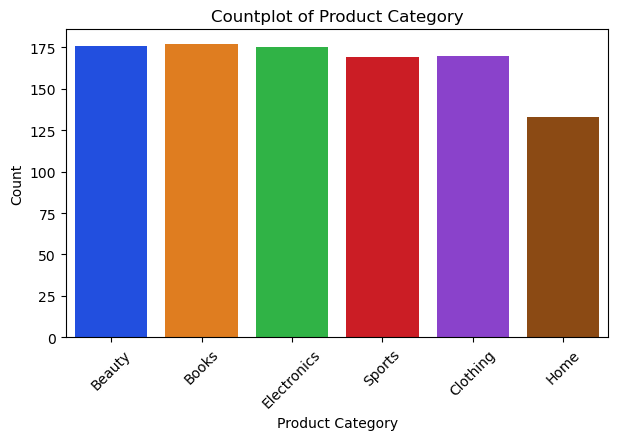

In [20]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="ProductCategory", palette = "bright")
plt.title("Countplot of Product Category")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

#### Insight: Books dominate sales valume

C:\Users\acar\AppData\Local\Temp\ipykernel_7360\2591131535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="City", palette = "bright")


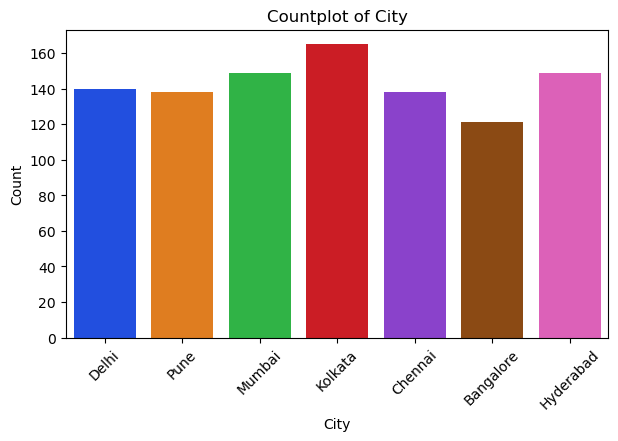

In [21]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="City", palette = "bright")
plt.title("Countplot of City")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

#### Insight: Kokata leads in order value

### Bivariate Analysis

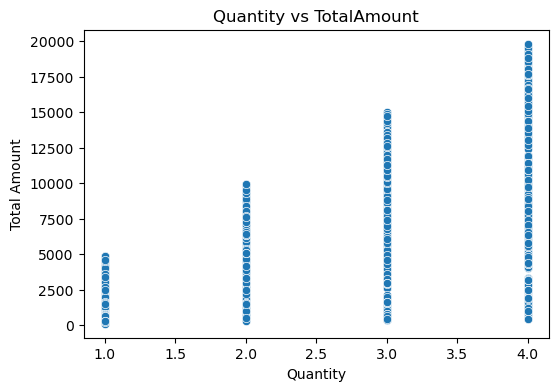

In [22]:
# Quantity vs TotalAmount

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Quantity", y="TotalAmount")
plt.title("Quantity vs TotalAmount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()

#### Insight: Higher quantity -> higher revenue

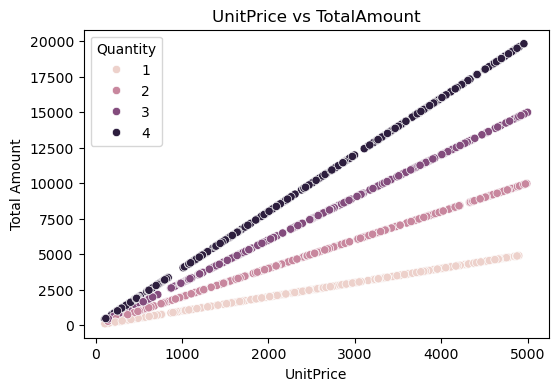

In [23]:
# UnitPrice vs TotalAmount

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="UnitPrice", y="TotalAmount", hue = df["Quantity"])
plt.title("UnitPrice vs TotalAmount")
plt.xlabel("UnitPrice")
plt.ylabel("Total Amount")
plt.show()

#### Insight: UnitPrice has a stronger impact on revenue than quantity

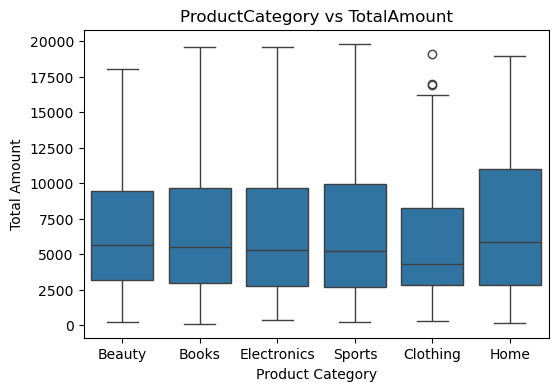

In [24]:
# ProductCategory vs TotalAmount

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="ProductCategory", y="TotalAmount")
plt.title("ProductCategory vs TotalAmount")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

#### Insight: Home and Electronics categories show the highest median order values, indication they contribute more to overall revenue per order.

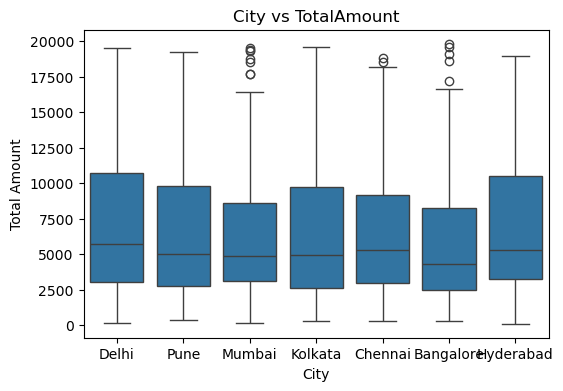

In [25]:
# City vs TotalAmount

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="City", y="TotalAmount")
plt.title("City vs TotalAmount")
plt.xlabel("City")
plt.ylabel("Total Amount")
plt.show()

#### Insights:
* Hydrabad and Delhi show higher median TotalAmount indicating stronger purchasing power or preference for highr-value products.
* Banglore and Mumbai display more high-value outliers, suggesting fewer but expensive orders
* All cities show right-skewed distributions, meaning high-value orders are less frequent but impactful

### Multivariate Insights

In [26]:
# Best Product-Category City Combinations
df.groupby(["ProductCategory","City"])["TotalAmount"].mean().sort_values(ascending=False)

ProductCategory  City     
Home             Hyderabad    8998.947368
Sports           Delhi        8303.600000
Beauty           Kolkata      8232.916667
Books            Chennai      8175.960000
Electronics      Hyderabad    8136.823529
Books            Delhi        7783.687500
Electronics      Bangalore    7720.000000
Home             Mumbai       7655.777778
Sports           Pune         7527.451613
                 Hyderabad    7331.066667
Beauty           Mumbai       7308.031250
Books            Pune         7299.250000
Beauty           Delhi        7246.200000
Home             Chennai      7029.636364
Beauty           Pune         6983.318182
Home             Delhi        6948.166667
Electronics      Chennai      6880.880000
Home             Pune         6804.230769
Clothing         Delhi        6797.880000
Electronics      Kolkata      6688.407407
Books            Bangalore    6655.090909
                 Kolkata      6559.769231
Clothing         Mumbai       6430.962963
Home   

In [27]:
# Which payment methods lead to the most successful(delivered) high-value orders?
df.groupby(["PaymentMethod", "OrderStatus"])["TotalAmount"].mean()

PaymentMethod  OrderStatus
COD            Cancelled      6313.296296
               Delivered      6370.607527
               Returned       6444.653846
Card           Cancelled      7128.793103
               Delivered      6738.732394
               Returned       7913.312500
NetBanking     Cancelled      7012.238095
               Delivered      6612.923810
               Returned       7784.050000
UPI            Cancelled      5611.909091
               Delivered      6590.009852
               Returned       6475.925926
Name: TotalAmount, dtype: float64

### Statistical Analysis

#### ANOVA - Product Category vs TotalAmount

In [28]:
from scipy.stats import f_oneway

# separet TotalAmount by ProductCategory

groups = [df[df["ProductCategory"] == cat]["TotalAmount"]
          for cat in df["ProductCategory"].unique()]



In [29]:
# Perform Annova

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(1.386615343213327, 0.22670218353550628)

* p_value > 0.05 
* we are fail to reject null hypothesis
* Mean total is same across all the category

####  Confidence Interval for Average Order Value

In [30]:
#sample data
from scipy import stats

mean_amount = df["TotalAmount"].mean()
std_amount = df["TotalAmount"].std()
n = df.shape[0]

In [31]:
# 95% confidence interval 
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error = z_score * (std_amount / np.sqrt(n))

In [32]:
lower_bound = mean_amount - margin_of_error
upper_bound = mean_amount + margin_of_error

mean_amount, lower_bound, upper_bound

(6619.387, 6321.0543478257805, 6917.719652174219)

95 % CI = (6321, 6917)

#### we are 95% confidence that the true average order value of Amazon customers lies within range 6321 and 6917. 